In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [8]:
# Filter Data for Data Analysts in the U.S.
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Extract the month from the posting date
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

# Create a pivot table for skill counts by month
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Sort columns by total skill counts
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

# Get monthly totals
DA_US_totals = df_DA_US.groupby('job_posted_month_no').size()

# Calculate percentage likelihood
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_US_totals / 100, axis=0)

# Convert month numbers to names
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')



<Figure size 640x480 with 0 Axes>

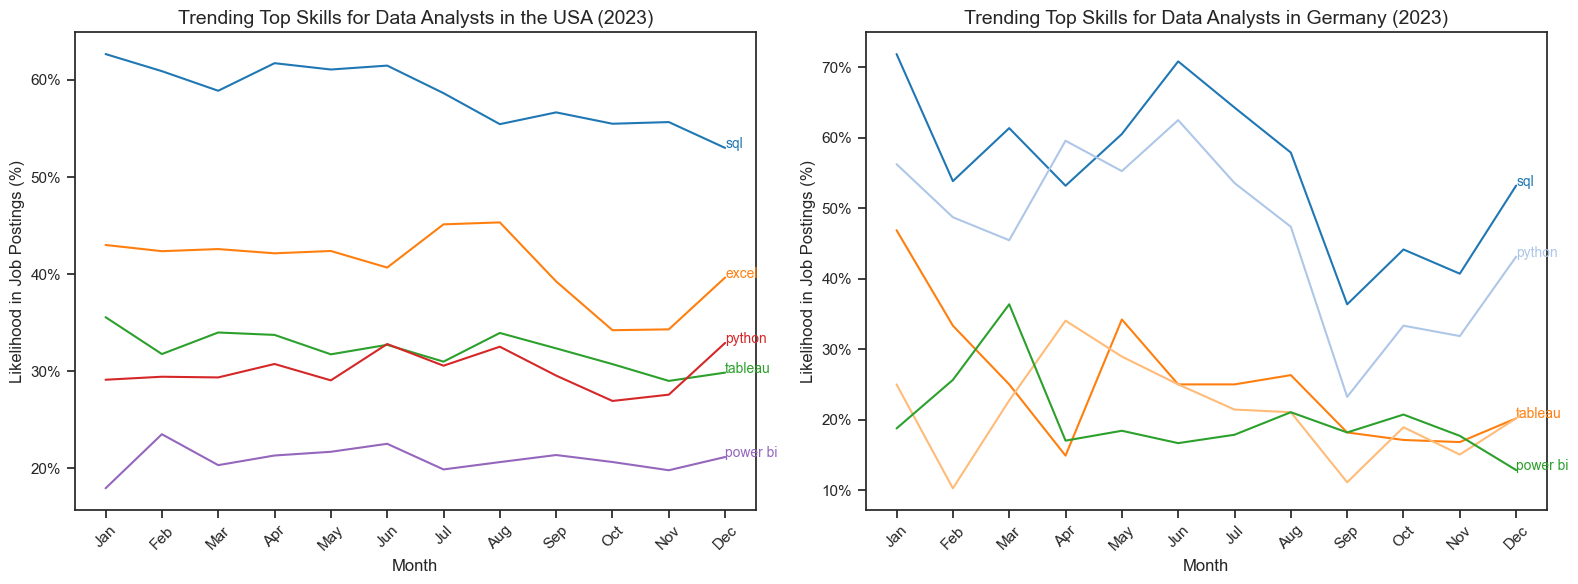

In [17]:
# Set the theme 
sns.set_theme(style='ticks')
sns.despine()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# U.S. Data Plot
df_plot_US = df_DA_US_percent.iloc[:, :5]
for i, col in enumerate(df_plot_US.columns):
    sns.lineplot(
        data=df_plot_US,
        x=df_plot_US.index,
        y=col,
        ax=axes[0],
        color=sns.color_palette("tab10")[i],
        dashes=False
    )
    # Annotate the end of each line
    axes[0].text(
        len(df_plot_US.index) - 1,  # x position near the end
        df_plot_US.iloc[-1, i],  # y position from U.S. data
        col,
        color=sns.color_palette("tab10")[i],
        fontsize=10
    )

axes[0].set_title('Trending Top Skills for Data Analysts in the USA (2023)', fontsize=14)
axes[0].set_ylabel('Likelihood in Job Postings (%)')
axes[0].set_xlabel('Month')
axes[0].set_xticks(df_plot_US.index)
axes[0].set_xticklabels(df_plot_US.index, rotation=45)
from matplotlib.ticker import PercentFormatter
axes[0].yaxis.set_major_formatter(PercentFormatter(decimals=0))  # Apply percentage format to the left plot

# Germany Data Plot
df_plot_DE = df_DA_DE_percent.iloc[:, :5]
for i, col in enumerate(df_plot_DE.columns):
    sns.lineplot(
        data=df_plot_DE,
        x=df_plot_DE.index,
        y=col,
        ax=axes[1],
        color=sns.color_palette("tab20")[i],
        dashes=False
    )
    # Annotate the end of each line
    axes[1].text(
        len(df_plot_DE.index) - 1,  # x position near the end
        df_plot_DE.iloc[-1, i],  # y position from German data
        col,
        color=sns.color_palette("tab20")[i],
        fontsize=10
    )

axes[1].set_title('Trending Top Skills for Data Analysts in Germany (2023)', fontsize=14)
axes[1].set_ylabel('Likelihood in Job Postings (%)')
axes[1].set_xlabel('Month')
axes[1].set_xticks(df_plot_DE.index)
axes[1].set_xticklabels(df_plot_DE.index, rotation=45)
axes[1].yaxis.set_major_formatter(PercentFormatter(decimals=0))  # Apply percentage format to the right plot

# Adjust layout
fig.tight_layout()
plt.show()


